In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# variable for path to files
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# read the files into dataframes
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# count rows, find if null data in city data df
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# just to make sure no null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# check data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# determine how many unique city types
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# determine how many of a type there are
sum(city_data_df['type'] == 'Urban')

66

In [10]:
sum(city_data_df['type'] == 'Suburban')

36

In [11]:
sum(city_data_df['type'] == 'Rural')

18

In [12]:
# determine if nulls in ride df
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# check data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# city column is only common column, so merge dataframes on that column
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create Dataframes for each type of city
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [18]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [19]:
# get ride count for each df
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [21]:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [22]:
# get average fare for each city type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [23]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [24]:
# get average drive count for each city type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

### Create Bubble Chart

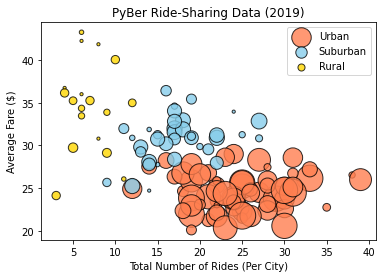

In [30]:
# create scatter plot for each type of city
# x axis is number of rides per city type
# y axis is avg fare
# bubble size is number of drivers
plt.scatter(urban_ride_count, urban_avg_fare, alpha=.8, s=10*urban_driver_count, 
            c='coral', linewidths=1, edgecolor='k', label='Urban')
plt.scatter(suburban_ride_count, suburban_avg_fare, alpha=.8, s=10*suburban_driver_count, 
            color='skyblue', linewidths=1, edgecolor='k', label='Suburban')
plt.scatter(rural_ride_count, rural_avg_fare, alpha=.8, s=10*rural_driver_count, 
            color='gold',linewidths=1, edgecolor='k', label='Rural')

plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.grid=True
plt.legend()